# GlobalAveragePooling (GAP)
- 입력 Feature map의 채널별로 평균값을 추출하여 1 x 1 x channel 의 Feature map을 생성하는 Pooling
- `model.add(keras.layers.GlobalAveragePooling2D())`
![gap01](figures/09_gap_01.png)

- Feature Extraction layer에서 추출한 Feature map을 Classifier layer로 Flatten해서 전달하면 많은 연결노드와 파라미터가 필요하게된다.     
GAP를 사용하면 노드와 파라미터의 개수를 효과적으로 줄일 수 있다.
- Feature map의 채널수가 많을 경우 GAP를 사용하는 것이 효과적이나 채널수가 적다면 Flatten을 사용하는 것이 좋다.


![gap02](figures/09_gap_02.png)

# Pretrained Model

- 다른 목적을 위해 미리 학습된 모델.
- Pretrained model을 현재 해결하려는 문제에 이용한다.
- 대부분 내가 만들려는 네트워크 모델에 포함시켜 사용한다.
    - 이런 방식을 Transfer Learning (전이 학습)이라고 한다.

## Keras에서 제공하는 Pretrained Model 
- tensorflow.keras.applications 패키지를 통해 제공
    - https://www.tensorflow.org/api_docs/python/tf/keras/applications?hl=ko
    - Modules
        - 각 모델별 입력 Image 전처리 함수 제공
    - Functions
        - 각 모델 생성함수
- 모델 생성함수의 주요 매개변수
    - `weights`: 모델의 학습된 weight 지정. 
        - 기본값- 'imagenet'. ImageNet 데이터셋으로 학습된 weight를 가진 모델 생성
    - `include_top`: fully connected layer(분류기)를 포함할지 여부. True 포함시킴, False: 포함 안 시킴
        - False를 지정하면 Feature Extractor인 Convolution Layer들로만 구성된 모델이 생성된다.
    - `input_shape`: Input(입력) 이미지의 크기 shape. 3D 텐서로 지정. (높이, 너비, 채널). 기본값: (224,224,3)

> 딥러닝 모델기반 application 개발시 대부분 Transfer Learning을 한다.  
> 다양한 분야에서 다양한 네트워크 모델들이 구현되어 공개 되어 있으며 학습된 Parameter들도 제공되고 있다.  
> [paperswithcode](https://paperswithcode.com/)에서 State Of The Art(SOTA) 논문들과 그 구현된 모델을 확인할 수 있다. 

> State Of The Art(SOTA): 특정 시점에 특정 분야에서 가장 성능이 좋은 모델을 말한다.

## Keras 제공 Pretrained model

In [1]:
from tensorflow import keras
from tensorflow.keras import applications

In [2]:
vgg16_1 = applications.VGG16(weights='imagenet', 
                                 include_top=False,
                                 input_shape=(224,224,3))

2022-07-21 11:17:10.306030: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-21 11:17:10.306278: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
58889256/58889256 [==============================] - 5s 0us/step


In [3]:
vgg16_1.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
vgg16_2 = applications.VGG16(weights='imagenet', 
                                 include_top=True,
                                 input_shape=(224,224,3))

553467096/553467096 [==============================] - 47s 0us/step


In [5]:
vgg16_2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

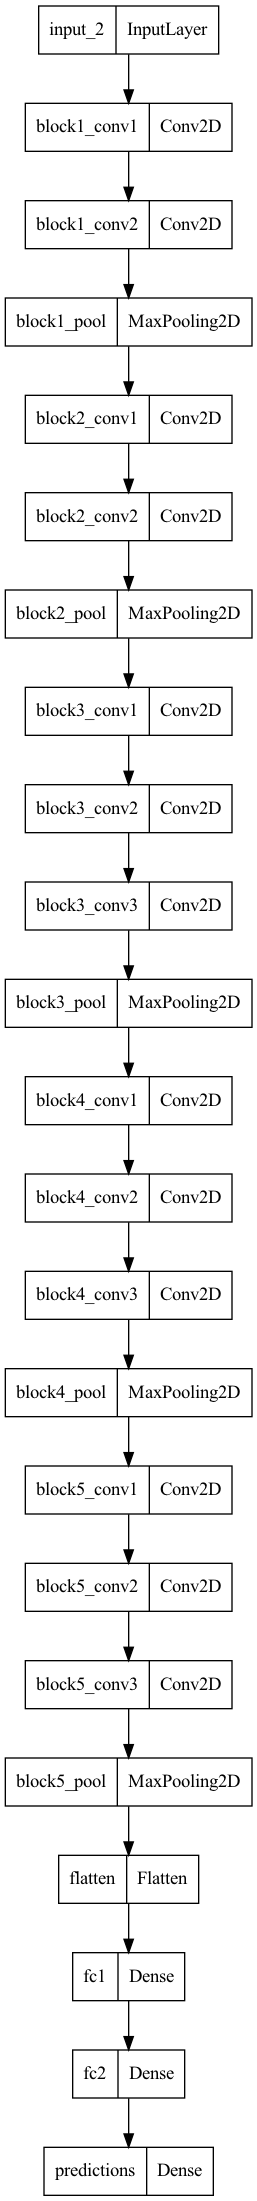

In [6]:
keras.utils.plot_model(vgg16_2)

In [7]:
resnet50 = applications.ResNet50V2(include_top=False, input_shape=(224,224,3))

94668760/94668760 [==============================] - 8s 0us/step


In [8]:
resnet50.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

## VGG16 Pretrained 모델을 이용해 이미지 분류
- Keras에서 제공하는 Pretrain 모델들은 Image Net 데이터셋을 학습 했다.
- 최종 Output 결과로 1000개의 class에 대한 확률을 출력한다.
    - Dense(units=1000, activation='softmax')

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import numpy as np

##### Pretrained Model download

In [10]:
vgg16 = keras.applications.VGG16()
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

##### 추론할 이미지 로딩

In [28]:
# img_path = 'test_img/car.jpg'
# img_path = 'test_img/bicycle.jpg'
img_path = 'test_img/cat.jpg'

img = load_img(img_path, target_size=(224, 224))
img_np = img_to_array(img) #ndarray 변환
img_np.shape

(224, 224, 3)

##### 전처리

In [29]:
input_tensor = keras.applications.vgg16.preprocess_input(img_np)
input_tensor.shape

(224, 224, 3)

##### 추론

In [30]:
pred = vgg16.predict(input_tensor[np.newaxis, ...])

1/1 [==============================] - 0s 15ms/step


In [31]:
print(pred.shape)
print(np.max(pred[0]))
print(np.argmax(pred[0], axis=-1))

(1, 1000)
0.7567709
282


In [32]:
from keras.applications.imagenet_utils import decode_predictions

label = np.argmax(pred, axis=-1)
label_class = decode_predictions(pred, top=3)

print("label num:", label[0])
for idx, lc in enumerate(label_class[0], start=1):
    print(f'{idx}. {lc[1]} ({lc[2]})')

label num: 282
1. tiger_cat (0.75677090883255)
2. tabby (0.19478195905685425)
3. Egyptian_cat (0.040945347398519516)


# Transfer learning (전이학습)
- 사전에 학습된 신경망의 구조와 파라미터를 재사용해서 새로운 모델(우리가 만드는 모델)의 시작점으로 삼고 해결하려는 문제를 위해 다시 학습시킨다.
- 전이 학습을 통해 다음을 해결할 수 있다.
    1. 데이터 부족문제
        - 딥러닝은 대용량의 학습데이터가 필요하다.
        - 충분한 데이터를 수집하는 것은 항상 어렵다.
    2. 과다한 계산량
        - 신경망 학습에는 엄청난 양의 계산 자원이 필요하다.

![transfer_learning01](figures/09_transfer_01.png)

- 미리 학습된(pre-trained) Model을 이용하여 모델을 구성한 뒤 현재 하려는 예측 문제를 해결한다.
- 보통 Pretrained Model에서 Feature Extraction 부분을 사용한다.
    - Computer Vision 문제의 경우 Bottom 쪽의 Convolution Layer(Feature Extractor)들은 이미지에 나타나는 일반적인 특성을 추출하므로 **다른 대상을 가지고 학습했다고 하더라도 재사용할 수 있다.**
    - Top 부분 Layer 부분은 특히 출력 Layer의 경우 대상 데이터셋의 목적에 맞게 변경 해야 하므로 재사용할 수 없다.

![transfer_learning02](figures/09_transfer_02.png)

> **Frozon**: Training시 parameter가 update 되지 않도록 하는 것을 말한다.

### Feature extraction 재사용
- Pretrained Model에서 Feature Extractor 만 가져오고 추론기(Fully connected layer)만 새로 정의한 뒤 그 둘을 합쳐서 모델을 만든다.
- 학습시 직접 구성한 추론기만 학습되도록 한다.
    - Feature Extractor는 추론을 위한 Feature 추출을 하는 역할만 하고 그 parameter(weight)가 학습되지 않도록 한다.
- Keras에서 모델/레이어의 parameter trainable 속성 변경
    -  **Layer.trainable=False**
        - Layer의 trainable 속성을 변경
    - **Model.trainable=False**
        - 모델내의 모든 Layer들의 trainable 속성을 변경
    - trainable 속성변경은 **모델 컴파일 전에** 해야 한다.
        
#### Backbone, Base network
전체 네트워크에서 Feature Extraction의 역할을 담당하는 부분을 backbone/base network라고 한다.

##### 이미지 다운로드

In [ ]:
import gdown
import os
from zipfile import ZipFile
url = 'https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU'
fname = 'cats_and_dogs_small.zip'
gdown.download(url, fname, quiet=False)

In [ ]:
import os
#zipfile모듈: Zip 압축파일을 다루는 모듈(압축하기, 풀기)
from zipfile import ZipFile

# 압축풀기: ZipFile(압축파일경로).extractall(풀경로)
with ZipFile(fname) as zipFile:
    zipFile.extractall(os.path.join('data','cats_and_dogs_small'))

##### import

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

##### 하이퍼파라미터 설정

In [ ]:
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

IMAGE_SIZE = 224

##### Util 함수 정의
##### 추론함수

In [ ]:
def predict_cat_dog(img_path, model, preprocess_input):
    """
    이미지를 받아서 모델을 이용해 추론 후 결과를 반환하는 함수
    [파라미터]
        img_path: str - 분류(추론)할 이미지 경로
        model: 학습된 모델 객체
        preprocess_input: 이미지 전처리 함수
        model: conv_base(convolution)을 통해 feature를 추출할지 여부
    [반환값]
        tuple: (예측확률, 예측라벨 index, 예측라벨명)
    """
    class_names = ['Cat', 'Dog']
    img = load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_np = img_to_array(img)
    img_np = img_np[np.newaxis, ...]
    
    input_tensor = preprocess_input(img_np)
        
    pred = model.predict(input_tensor)[0][0]
    pred_class = int(np.where(pred<=0.5, 0, 1))
    pred_label = class_names[pred_class]
    
    return pred, pred_class, pred_label

##### ImageDataGenerator 를 생성하는 함수

In [ ]:
def get_generator(preprocess_input):
    """
    train/validation/test 용 ImageDataGenerator 생성해서 반환하는 함수
    [파라미터]
        preprocess_input: 전처리 함수
    [반환값]
        tuple: (train iter, validation iter, test iter)
    """
    train_dir = "data/cats_and_dogs_small/train/"
    val_dir = 'data/cats_and_dogs_small/validation/'
    test_dir = 'data/cats_and_dogs_small/test'
    
    train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                       rotation_range=40, 
                                       brightness_range=[0.7, 1.3], 
                                       zoom_range=0.2, 
                                       horizontal_flip=True, 
                                       width_shift_range=0.2, 
                                       height_shift_range=0.2, 
                                       fill_mode='constant')
    val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    
    
    train_iter = train_datagen.flow_from_directory(train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=N_BATCHS, class_mode='binary')
    val_iter = val_datagen.flow_from_directory(val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=N_BATCHS, class_mode='binary')
    test_iter = test_datagen.flow_from_directory(test_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=N_BATCHS, class_mode='binary')
    
    return train_iter, val_iter, test_iter

##### train/validation/test 데이터셋 로드

In [ ]:
train_iter, val_iter, test_iter = get_generator(applications.vgg16.preprocess_input)

##### 모델정의

In [ ]:
def create_model1(backbone):
    """
    Feature Exctractor 모델을 받아서 개/고양이 분류 모델을 만들어 반환
    [Parameter]
        backbone: Feature Exctractor
    [Return]
        model
    """
    model = keras.Sequential()
    
    backbone.trainable = False
    model.add(backbone)
    
    model.add(layers.GlobalAveragePooling2D())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(layers.Dense(units=1, activation='sigmoid'))
    
    return model

In [ ]:
backbone = applications.VGG16(include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
model1 = create_model1(backbone)

model1.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model1.summary()

In [ ]:
keras.utils.plot_model(model1, show_shapes=True)

##### 학습

In [ ]:
hist = model1.fit(train_iter, epochs=N_EPOCHS, 
                   steps_per_epoch=len(train_iter), 
                   validation_data=val_iter,
                   validation_steps=len(val_iter))

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='validation loss')

plt.legend()
plt.show()

##### 평가

In [ ]:
model1.evaluate(test_iter)

##### 새로운 데이터 추론

In [ ]:
predict_cat_dog('cat.jpg', model1, applications.vgg16.preprocess_input) 

In [ ]:
predict_cat_dog('dog.jpg', model1, applications.vgg16.preprocess_input)

## Fine-tuning(미세조정)
- Transfer Learning을 위한 Pretrained 모델을 내가 학습시켜야 하는 데이터셋(Custom Dataset)으로 재학습시키는 것을 fine tunning 이라고 한다.
- 주어진 문제에 더 적합하도록 Feature Extractor의 가중치들도 조정 한다.

### Fine tuning 전략
![transfer02](figures/09_transfer_03.png)

- **세 전략 모두 추론기는 train한다.**

1. **<font size='5'>전체 모델을 전부 학습시킨다.(1번)</font>**
    - Pretrained 모델의 weight는 Feature extraction 의 초기 weight 역할을 한다.
    - **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **낮은 경우** 적용.
    - 학습에 시간이 많이 걸린다.
    
    
2. **<font size='5'>Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습시킨다.(2번)</font>**
    - **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
    - **Train dataset의 양이 적고** Pretained 모델이 학습했던 dataset과 custom dataset의 class간의 유사성이 **낮은 경우** 적용
    
    
3. **<font size='5'>Pretrained 모델 전체를 고정시키고 classifier layer들만 학습시킨다.(3번)</font>**
    - **Train dataset의 양이 적고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
  
  
> **Custom dataset:** 내가 학습시키고자 하는 dataset 

> 1번 2번 전략을 Fine tuning 이라고 한다.

![fine tuning](figures/09_finetuning.png)

## Model, Layer의 weight 조회

### Model에서 Layer들 조회
- model객체.layers
    - 모델을 구성하는 layer 객체들을 담은 리스트
- model객체.get_layer(Layer이름:str)
    - argument로 전달한 이름의 Layer객체를 반환
    

### Model과 Layer의 weight들 조회 및 설정
- Layer와 Model은 **Weight 조회**와 관련해 세가지 **속성**을 제공
    - **weights:** 레이어의 모든 weight 변수들을 담은 리스트
        - get_weights() : 레이어의 모든 weight 변수 리스트를 카피해서 반환한다.
    - **trainable_weights:** Train(학습)시 업데이트 되는 weights들 리스트
    - **non_trainable_weights:** Train(학습)시 업데이트 되지 않는(훈련되지 않는) weights들 리스트
- Layer와 Model은 boolean 값을 가지는 속성 **`trainable`**을 제공
    - trainable을 **False로** 설정하면 Layer의 weights들이 훈련가능에서 **훈련 불가능** 상태로 변경된다. 이런 상태를 **Frozen-동결** 이라고 하며 학습시 weight들이 업데이트 되지 않는다.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

test_model = keras.Sequential()
test_model.add(layers.Conv2D(filters=32, kernel_size=3,  padding='same', activation='relu', input_shape=(28,28,1)))
test_model.add(layers.MaxPooling2D(padding='same'))

test_model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
test_model.add(layers.MaxPooling2D(padding='same'))

test_model.add(layers.Flatten())
test_model.add(layers.Dense(units=128, activation='relu'))
test_model.add(layers.Dense(units=1, activation='sigmoid', name='output'))


In [ ]:
test_model.summary()

In [ ]:
test_layers = test_model.layers
print(type(test_layers), len(test_layers))

In [ ]:
test_layers[0], test_layers[1], test_layers[6], test_layers[4]

In [ ]:
test_layers[0].name, test_layers[6].name

In [ ]:
output_layer = test_model.get_layer("output")
output_layer

In [ ]:
conv_layer_1 = test_model.get_layer('conv2d')
conv_layer_1

In [ ]:
max_pooling2d_1 = test_model.get_layer('max_pooling2d_1')
max_pooling2d_1

In [ ]:
model_params = test_model.weights
type(model_params), len(model_params)

In [ ]:
param = conv_layer_1.weights

type(param), len(param) 

In [ ]:
param[0].shape 

In [ ]:
param[1].shape 

In [ ]:
max_pooling2d_1.weights

In [ ]:
print(conv_layer_1.trainable)
conv_layer_1.trainable = False
print(conv_layer_1.trainable) 

In [ ]:
test_model.summary()

### Fine Tuning 예제

#### Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습

- Conv_base에서 가장 Top부분에 있는 레이어에 대해 fine-tuning.
    - 앞의 layer들은 비교적 일반적이고 재사용 가능한 feature를 학습
    - 너무 많은 parameter를 학습시키면 overfitting의 위험이 있음 (특히 새로운 데이터의 수가 적을 때)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import numpy as np

np.random.seed(0)
tf.random.set_seed(0)

##### 하이퍼파라미터 

In [ ]:
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

IMAGE_SIZE = 224

##### 모델 정의, 컴파일

In [ ]:
def create_model2():
    """
    VGG16에서 block5_conv2, block5_conv3 은 학습 가능하도록 fine tuning을 한다.
    """
    model = keras.Sequential()
    backbone = applications.VGG16(include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    is_trainable = False
    for layer in backbone.layers:
        if layer.name == 'block5_conv2':
            is_trainable = True
        layer.trainable = is_trainable
    
    model.add(backbone)
    model.add(layers.GlobalAveragePooling2D())
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(layers.Dense(units=1, activation='sigmoid'))

    return model

In [ ]:
model2 = create_model2()
model2.compile(optimizer=keras.optimizers.Adam(LEARNING_RATE), 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

In [ ]:
model2.summary()

##### callback 설정
- 모델 저장

In [ ]:
save_path = 'path'

mc_callback = keras.callbacks.ModelCheckpoint(filepath=save_path, save_best_only=True, monitor='val_loss', verbose=2)

##### 학습

In [ ]:
hist = model2.fit(train_iter, 
                   epochs=N_EPOCHS, 
                   steps_per_epoch=len(train_iter), 
                   validation_data=val_iter, 
                   validation_steps=len(val_iter), 
#                    callbacks=[mc_callback]
                  )

##### 결과 시각화

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='train loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='validation loss')

plt.legend()
plt.show()

##### 최종 평가

In [ ]:
model2.evaluate(test_iter)

##### 새로운 데이터 추론

In [ ]:
predict_cat_dog('cat.jpg', model2, applications.vgg16.preprocess_input) 

In [ ]:
predict_cat_dog('dog.jpg', model2, applications.vgg16.preprocess_input) 